#Step 1: Upload and Extract the ZIP file
This step allows to upload a file from your computer to Colab. Once the file is uploaded, the code grabs the name of the file you just uploaded so it can be used later in the process.

In [9]:
from google.colab import files
uploaded = files.upload()

zip_file_name = next(iter(uploaded.keys()))


Saving buoy_dataset.zip to buoy_dataset.zip


#Step 2: Import Necessary Libraries

In this step, have import all the libraries and modules that will need for the project.These libraries form the foundation for file handling, data preparation, and building the neural network

1- os and zipfile: For handling file and directory operations, and for extracting the contents of the ZIP file.

2- pandas: For data manipulation and analysis, especially working with tables.

3- shutil: For copying files and creating compressed archives.

4- PIL (Pillow): For image processing tasks.

5- sklearn: For encoding labels and splitting the data into training and testing sets.


6- numpy: For handling arrays and numerical computations.

7- matplotlib: For visualizing data through plots.

8- tensorflow and keras: For building and training deep learning models, specifically convolutional neural networks for image processing tasks.

In [10]:
import os
import zipfile
import pandas as pd
from shutil import copyfile, make_archive
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Step 3: Define the Path, Create Directory, and Extract Images

This step involves specifying the path to the uploaded ZIP file, creating a folder named "images" to store the extracted files, and then extracting the contents of the ZIP file into this folder. This prepares the images for use in the next stages of your project.

In [11]:
zip_file_path = zip_file_name
extracted_folder_path = 'images/'
os.makedirs(extracted_folder_path, exist_ok=True)


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)


#Step 4: Load and display the 8 kinds of buoys and their labels and descriptions
This step defines and displays information about eight types of navigation buoys, including their labels and descriptions of their functions and safety instructions.

In [12]:
buoy_metadata = {
    'port': {
        'label': 'Region A red port lateral mark',
        'description': 'Port is left and associated with the colour red and cylinder shape in Region A. On the way into a harbour we will keep the red marks to the left (port) side of our ship or boat to travel safely within the channel opposite when exiting the harbour or channel.'
    },
    'stbd': {
        'label': 'Region A Green starboard lateral mark',
        'description': 'Starboard is right and associated with the colour green and cone shape in Region A. On the way into a harbour we will keep the green marks to the right (starboard) side of our ship or boat to travel safely within the channel opposite when exiting the harbour or channel.'
    },
    'south': {
        'label': 'South Cardinal Buoy',
        'description': 'A South Cardinal indicates that the safest water is to the South. You should pass the South side of the mark.'
    },
    'north': {
        'label': 'North Cardinal Buoy',
        'description': 'A North Cardinal indicates that the safest water is to the North. You should pass the North side of the mark.'
    },
    'east': {
        'label': 'East Cardinal Buoy',
        'description': 'An East Cardinal indicates that the safest water is to the East. You should pass the East side of the mark.'
    },
    'west': {
        'label': 'West Cardinal Buoy',
        'description': 'A West Cardinal indicates that the safest water is to the West. You should pass the West side of the mark.'
    },
    'isolateddanger': {
        'label': 'Isolated Danger Mark',
        'description': 'Isolated danger marks show where there is an isolated danger that has navigable water all around it (for example, an isolated shoal, rock, or wreck) – but don\'t pass too close. Keep a safe distance.'
    },
    'safewater': {
        'label': 'Fairway Buoy / Safe Water Mark Buoy',
        'description': 'Safe Water marks serve to indicate that there is navigable water all around the mark and do not mark a danger. Safe water marking can be used for fairway, mid-channel, centre line, or landfall marks. This mark may also be used to indicate channel entrance, port or estuary approach, or landfall.'
    }
}


#Step 5:Load the CSV file to check its contents and Display the 8 kinds of buoys and their labels and descriptions
This step involves loading a CSV file that contains data about buoys and displaying the information about the eight types of buoys defined earlier. The CSV file is read into a DataFrame using `pandas`, and then the details for each buoy type, including its label and description, are printed out. This allows you to verify and review the buoy information from the dataset.

In [13]:
csv_file_path = os.path.join(extracted_folder_path, 'buoy_dataset_with_isolated_danger.csv')
df = pd.read_csv(csv_file_path)

for key, value in buoy_metadata.items():
    print(f"Buoy Type: {key}")
    print(f"Label: {value['label']}")
    print(f"Description: {value['description']}")
    print()

Buoy Type: port
Label: Region A red port lateral mark
Description: Port is left and associated with the colour red and cylinder shape in Region A. On the way into a harbour we will keep the red marks to the left (port) side of our ship or boat to travel safely within the channel opposite when exiting the harbour or channel.

Buoy Type: stbd
Label: Region A Green starboard lateral mark
Description: Starboard is right and associated with the colour green and cone shape in Region A. On the way into a harbour we will keep the green marks to the right (starboard) side of our ship or boat to travel safely within the channel opposite when exiting the harbour or channel.

Buoy Type: south
Label: South Cardinal Buoy
Description: A South Cardinal indicates that the safest water is to the South. You should pass the South side of the mark.

Buoy Type: north
Label: North Cardinal Buoy
Description: A North Cardinal indicates that the safest water is to the North. You should pass the North side of th


#Step 6: Train the dataset
This step loads and preprocesses images from the dataset, encodes their labels into numbers, splits the data into training and testing sets, and sets up data generators to feed the images into the model for training and validation.

In [14]:
def load_images_and_labels(df, extracted_folder_path):
    images = []
    labels = []
    for index, row in df.iterrows():
        image_path = os.path.join(extracted_folder_path, row['Filename'])
        image = Image.open(image_path)
        image = image.resize((64, 64))  # Resize image for consistency
        image = np.array(image)
        if image.shape == (64, 64, 3):  # Ensure image is in RGB format
            images.append(image)
            labels.append(row['Label'])
    return np.array(images), np.array(labels)

images, labels = load_images_and_labels(df, extracted_folder_path)

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Step 5: Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_test, y_test, batch_size=32)


# Step 7: Build the model
This step builds and compiles a convolutional neural network with multiple layers for image classification, using the Adam optimizer and sparse categorical cross-entropy loss.

In [15]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Step 8: Train and save model
This step trains the model using the training data and validates it with the validation data over 15 epochs. After training, the model is saved to a file named `iala_buoy_identification.h5`.

In [16]:
history = model.fit(train_generator, validation_data=val_generator, epochs=15)

model.save('iala_buoy_identifiaction.h5')

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.2535 - loss: 1.9927 - val_accuracy: 0.4678 - val_loss: 1.5635
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.4069 - loss: 1.5629 - val_accuracy: 0.5205 - val_loss: 1.2367
Epoch 3/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 320ms/step - accuracy: 0.5401 - loss: 1.2009 - val_accuracy: 0.5731 - val_loss: 1.0214
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.6666 - loss: 0.9957 - val_accuracy: 0.6725 - val_loss: 0.8958
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - accuracy: 0.6777 - loss: 0.8790 - val_accuracy: 0.6257 - val_loss: 1.0117
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - accuracy: 0.7234 - loss: 0.7468 - val_accuracy: 0.7018 - val_loss: 0.8376
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - accuracy: 0.7764 - loss: 0.5899 - val_accuracy: 0.7193 - val_loss: 0.8238
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.8122 - loss: 0.5525 - val_accuracy: 0.7368 - va

# Step 9: Plot accuracy and loss over the training process
This step plots the training and validation accuracy and loss over the epochs. It creates two graphs: one showing how accuracy improves over time and another showing how the loss changes, allowing you to visualize the model's performance and training progress.

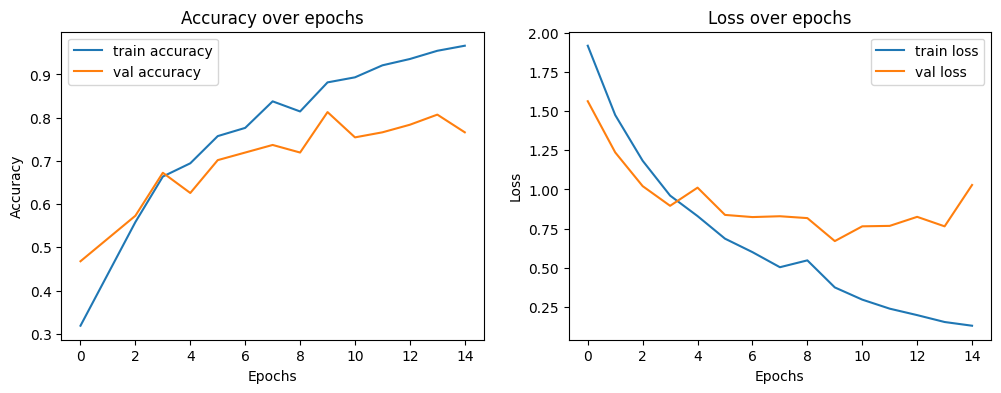

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 10: step defines two functions for uploading and classifying images:

1.classify_buoy(image_path): Takes an image file path, preprocesses the image, predicts the buoy type using the trained model, and retrieves its label, description, and recommended action.

2.upload_and_classify(): Handles file uploads, uses the `classify_buoy` function to classify the uploaded image, and displays the image along with its buoy type, description, and action instructions.

In [18]:
def classify_buoy(image_path):
    image = Image.open(image_path)
    image = image.resize((64, 64))
    image = np.array(image) / 255.0
    image = image.reshape(1, 64, 64, 3)
    label_encoded = np.argmax(model.predict(image), axis=1)
    label = label_encoder.inverse_transform(label_encoded)[0]
    action_dict = {
        'Region A red port lateral mark': 'Keep buoy to your left when entering harbor or channel.',
        'Region A Green starboard lateral mark': 'Keep buoy to your right when entering harbor or channel.',
        'Fairway Buoy / Safe Water Mark Buoy': 'Safe water, can pass on either side.',
        'Isolated Danger Mark': 'Danger, keep clear.',
        'North Cardinal Buoy': 'Pass to the north of the buoy.',
        'South Cardinal Buoy': 'Pass to the south of the buoy.',
        'East Cardinal Buoy': 'Pass to the east of the buoy.',
        'West Cardinal Buoy': 'Pass to the west of the buoy.'
    }
    description = next(value['description'] for key, value in buoy_metadata.items() if value['label'] == label)
    action = action_dict.get(label, 'No action defined.')
    return label, description, action

def upload_and_classify():
    uploaded = files.upload()
    for fname in uploaded.keys():
        buoy_type, description, action = classify_buoy(fname)
        display(Image.open(fname))
        print(f"Uploaded image: {fname}")
        print(f"Buoy Type: {buoy_type}")
        print(f"Description: {description}")
        print(f"Action: {action}")

# Step 11: Run the upload and classify function
This step runs the `upload_and_classify` function to process an image upload. It then enters a loop, repeatedly asking the user to upload another image or type 'exit' to stop the process. This allows for continuous classification of new images until the user decides to end the session.

Saving download.png to download.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


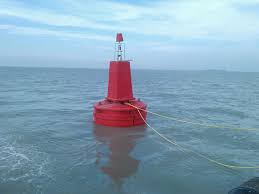

Uploaded image: download.png
Buoy Type: Region A red port lateral mark
Description: Port is left and associated with the colour red and cylinder shape in Region A. On the way into a harbour we will keep the red marks to the left (port) side of our ship or boat to travel safely within the channel opposite when exiting the harbour or channel.
Action: Keep buoy to your left when entering harbor or channel.
Upload another image for classification or type 'exit' to stop: exit


In [19]:
upload_and_classify()


while True:
    user_input = input("Upload another image for classification or type 'exit' to stop: ")
    if user_input.lower() == 'exit':
        break
    else:
        upload_and_classify()
